# Logistic Regression Models

To test ability to learn on these models versus the original baseline, train different LOPO logistic regression models.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import numpy as np

## Extra Functions

In [10]:
def label_type(row):
    """ Converts continuous label to categorical label
    """
    if row['scaled_effect'] < .99:
        return('Deleterious')
    elif row['scaled_effect'] > 1.1:
        return('Beneficial')
    else:
        return('Netural')

## Logistic Regression Model Function

In [14]:
def logreg(protein):
    train_data = data[data.protein != protein].drop(['protein', 'pdb', 'resnum'], axis=1)
    train_data['type'] = data.apply(lambda row: label_type(row), axis = 1)
    train_data.drop(['scaled_effect'], axis=1, inplace=True)
    test_data = data[data.protein == protein].drop(['protein', 'pdb', 'resnum'], axis=1)
    test_data['type'] = test_data.apply(lambda row: label_type(row), axis = 1)
    test_data.drop(['scaled_effect'], axis=1, inplace=True)
    
    y_train = train_data.type
    x_train = preprocessing.scale(train_data.drop(['type'], axis=1))
    y_test = test_data.type
    x_test = preprocessing.scale(test_data.drop(['type'], axis=1))
    
    logreg = LogisticRegression(multi_class = 'ovr', max_iter = 1000)
    logreg.fit(x_train, y_train)
    probs = logreg.predict_proba(x_test)

    #Precision and Accuracy
    predictions = logreg.predict(x_test)
    precision = precision_score(y_test, predictions, average="macro")
    score = logreg.score(x_test, y_test)
    print('Accuracy: {}'.format(score))
    print('Precision: {}'.format(precision))

    # Confusion Matrix Heatmap Individual
    cmatrix = confusion_matrix(y_test, predictions)
    ax = plt.axes()
    sns.heatmap(cmatrix, xticklabels = ['Beneficial', 'Deleterious', 'Neutral'], yticklabels = ['Beneficial', 'Deleterious', 'Neutral'])
    ax.set_title('{}'.format(protein))
    plt.savefig('img/' + protein + '-lopo-logreg-cmatrix.png', dpi=300)
    return(cmatrix)

## Training and Running Logistic Regression Models

In [12]:
## Load Dataset
data = pd.read_csv('data/merged.csv')
data.protein.unique()

array(['TEM-1', 'Kka2', 'Uba1', 'PSD95pdz3', 'Pab1', 'hsp90'],
      dtype=object)

Accuracy: 0.520763723150358
Precision: 0.3859958826664321


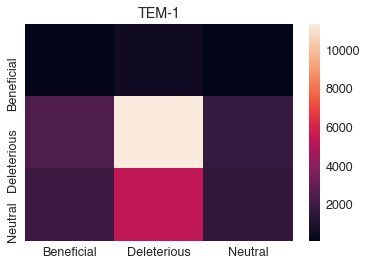

In [15]:
## TEM-1
tem1_cm = logreg('TEM-1')

Accuracy: 0.4915262515262515
Precision: 0.35708285191492944


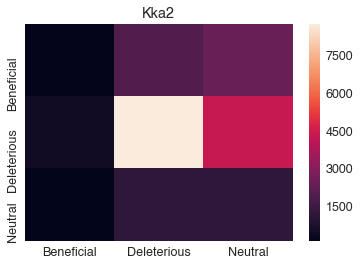

In [25]:
kka2_cm = logreg('Kka2')

Accuracy: 0.6444281524926686
Precision: 0.43198941238156924


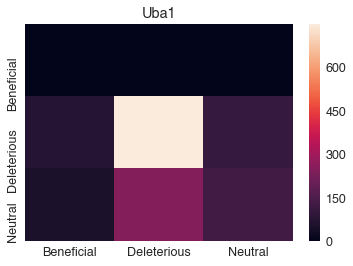

In [26]:
uba1_cm = logreg('Uba1')

Accuracy: 0.5126903553299492
Precision: 0.43146834587917393


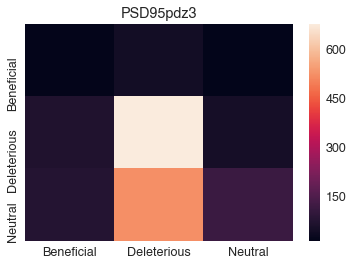

In [27]:
psd95_cm = logreg('PSD95pdz3')

Accuracy: 0.6144859813084113
Precision: 0.3756310359964881


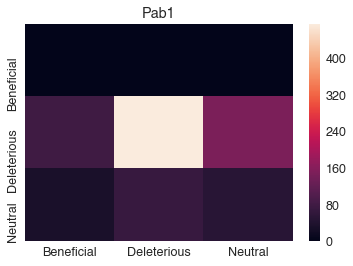

In [28]:
pab1_cm = logreg('Pab1')

Accuracy: 0.7411764705882353
Precision: 0.62531328320802


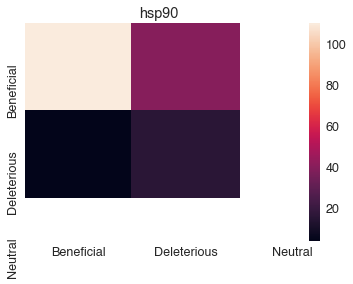

In [29]:
hsp90_cm = logreg('hsp90')

## Generating Combined Heatmap Figure for Milestone 2

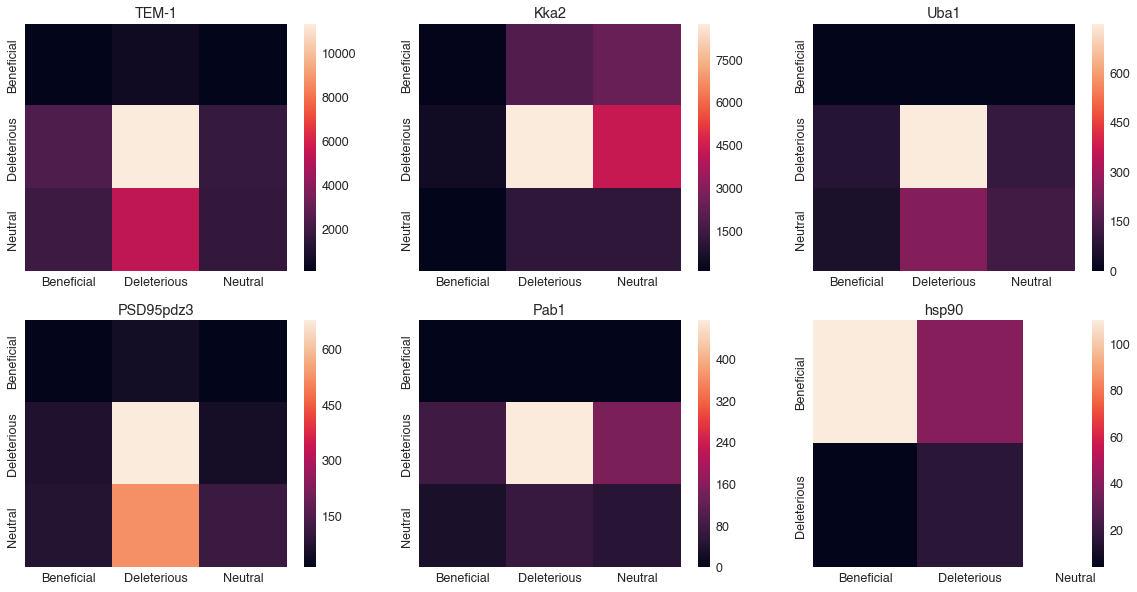

In [44]:
# List of proteins to loop over
proteins = ['TEM-1', 'Kka2', 'Uba1', 'PSD95pdz3', 'Pab1', 'hsp90']
cm_list = [tem1_cm, kka2_cm, uba1_cm, psd95_cm, pab1_cm, hsp90_cm]
figure, ax = plt.subplots(2,3, figsize=(20,10))
# figure.subplots_adjust(hspace = 0.4, wspace = 0.5)

for i in range(len(proteins)):
    if i <= 2:
        sns.heatmap(cm_list[i],
                    xticklabels=['Beneficial', 'Deleterious', 'Neutral'],
                    ax=ax[0,i])
        ax[0,i].set_yticklabels(['Beneficial', 'Deleterious', 'Neutral'], va="center")
        ax[0,i].set(title=proteins[i])
    else:
        sns.heatmap(cm_list[i],
                    xticklabels=['Beneficial', 'Deleterious', 'Neutral'],
                    ax=ax[1,i-3])
        ax[1,i-3].set_yticklabels(['Beneficial', 'Deleterious', 'Neutral'], va="center")
        ax[1,i-3].set(title=proteins[i])

    
plt.savefig("img/combined-hm.png")